In [1]:
import os

In [2]:
os.getcwd()

'/Users/ruchideshmukh'

In [3]:
os.chdir('/Users/ruchideshmukh/Desktop/Banking_data')

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
mycustomers=pd.read_csv('bank_subscription.csv')


In [6]:
mycustomers.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

In [7]:
mycustomers.shape


(45211, 17)

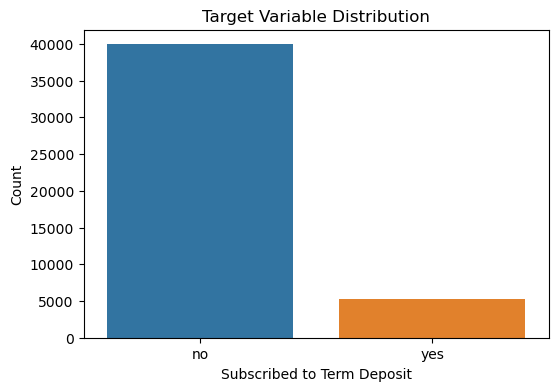

In [8]:
#Visualisation
plt.figure(figsize=(6, 4))
sns.countplot(x='y', data=mycustomers)
plt.title('Target Variable Distribution')
plt.xlabel('Subscribed to Term Deposit')
plt.ylabel('Count')
plt.show()

Text(0.5, 1.0, 'Age Distribution')

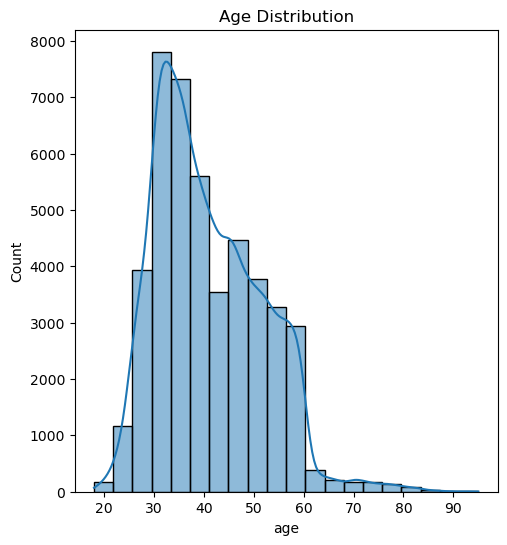

In [9]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(mycustomers['age'], bins=20, kde=True)
plt.title('Age Distribution')

Text(0.5, 1.0, 'Job Distribution')

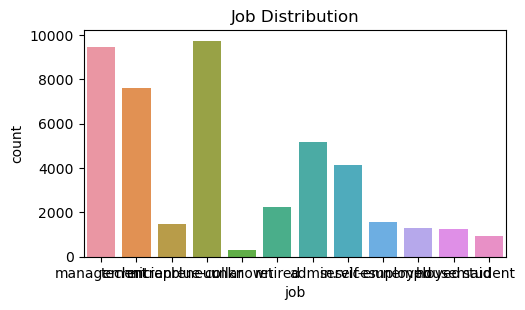

In [10]:
plt.figure(figsize=(12, 10))
plt.subplot(3, 2, 1)
sns.countplot(x='job', data=mycustomers)
plt.subplot(3, 2, 1)
sns.countplot(x='job', data=mycustomers)
plt.title('Job Distribution')

In [12]:
mycustomers.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

In [13]:
#Check for any missing values
mycustomers.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [14]:
#get all independent variables 
x=mycustomers.drop(['y','contact','poutcome'],axis=1)

In [15]:
x.head()

age           job  marital  education default  balance housing loan  day  \
0   58    management  married   tertiary      no     2143     yes   no    5   
1   44    technician   single  secondary      no       29     yes   no    5   
2   33  entrepreneur  married  secondary      no        2     yes  yes    5   
3   47   blue-collar  married    unknown      no     1506     yes   no    5   
4   33       unknown   single    unknown      no        1      no   no    5   

  month  duration  campaign  pdays  previous  
0   may       261         1     -1         0  
1   may       151         1     -1         0  
2   may        76         1     -1         0  
3   may        92         1     -1         0  
4   may       198         1     -1         0

In [16]:
#Convert string columns to numeric
x=pd.get_dummies(x)

In [17]:
x.head()

age  balance  day  duration  campaign  pdays  previous  job_admin.  \
0   58     2143    5       261         1     -1         0       False   
1   44       29    5       151         1     -1         0       False   
2   33        2    5        76         1     -1         0       False   
3   47     1506    5        92         1     -1         0       False   
4   33        1    5       198         1     -1         0       False   

   job_blue-collar  job_entrepreneur  ...  month_dec  month_feb  month_jan  \
0            False             False  ...      False      False      False   
1            False             False  ...      False      False      False   
2            False              True  ...      False      False      False   
3             True             False  ...      False      False      False   
4            False             False  ...      False      False      False   

   month_jul  month_jun  month_mar  month_may  month_nov  month_oct  month_sep  
0      False      False      False       True      False      False      False  
1      False      False      False       True      False      False      False  
2      False      False      False       True      False      False      False  
3      False      False      False       True      False      False      False  
4      False      False      False       True      False      False      False  

[5 rows x 44 columns]

In [18]:
#get dependent variables
y=mycustomers[['y']]

In [20]:
y.head()

y
0  no
1  no
2  no
3  no
4  no

In [21]:
#Divide the data into training & test set
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20)

In [22]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
tree_model=DecisionTreeClassifier()

In [23]:
tree_model.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [24]:
#apply the model into testset
predicted_by_tree_model=tree_model.predict(xtest)

In [25]:
#Validation
from sklearn.metrics import recall_score,precision_score
recall_score(ytest,predicted_by_tree_model,pos_label='yes')

0.46482889733840305

In [26]:
#Precision score
precision_score(ytest,predicted_by_tree_model,pos_label='yes')

0.4425339366515837

In [27]:
#Using RandomForestAlgorithm
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier()

In [28]:
rf_model.fit(xtrain,ytrain)

/Users/ruchideshmukh/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [29]:
#apply random forest model into testset
predicted_value=rf_model.predict(xtest)

In [30]:
recall_score(ytest,predicted_value,pos_label='yes')

0.37832699619771865

In [31]:
precision_score(ytest,predicted_value,pos_label='yes')

0.6461038961038961

In [32]:
mycustomers.y.value_counts()

y
no     39922
yes     5289
Name: count, dtype: int64